# Question 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet
has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their
claims and believe that on average each packet does not contain 500 grams of biryani.
How do you prove your claim? 

In [ ]:
Ho =Null Hypothesis = The weight of the packet is equal to 500 grams
Ha =Alternate Hypothesis = The weight of the packet is NOT equal to 500 grams

The z score is calculated from the below formula

$$T - statistic = \sqrt{\frac{\Sigma(sample mean(i) - population mean)^2}{sample size - 1}}$$

$$ T - statistic  =  \sqrt{\frac{\Sigma(X(i) - \mu)^2}{n - 1}}$$

In [11]:
random.seed(4)
sample = random.sample(range(400,600),10)
sample

[460, 477, 426, 584, 501, 522, 439, 423, 417, 405]

We have randomly choosen 10 numbers from the range 400 to 600.

In [12]:
sample_mean = np.mean(sample)
sample_mean

465.4

In [98]:
# defining the population paramaeters
pop_mean = 500

In [99]:
sample_size = len(sample)
sample_size

10

pop_mean = 500;   pop_std = 50;   sample_mean=465.4;   sample_size=10

In [22]:
# calculating the Estimated Population Standard Deviation
def est_pop_std(sample):
    k=[]
    for i in sample:
        k.append(((i - pop_mean)**2)/(sample_size-1))
    return (np.sqrt(np.sum(k))) 

In [100]:
est_pop_std(sample)

67.25573085866611

In [101]:
# Calculating the Standard error of the sampling distribution
std_error = est_pop_std(sample)/np.sqrt(sample_size)
std_error

21.268129521265692

pop_mean = 500
est_pop_std = 67.26
sample_mean = np.mean(sample) =  465.4
std_error = 21.27
sample_size = 10


In [102]:
# Calculating the T statistic
T_stat = ((sample_mean - pop_mean)/std_error)
T_stat

-1.626847342894164

In [46]:
df = sample_size - 1

In [14]:
import scipy.stats

In [103]:
# Two tailed T critical value calculation
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
T_critical = scipy.stats.t.ppf(q=1-.05/2,df=sample_size-1)
T_critical

2.2621571627409915

 Thus, if the test statistic is less than -2.26 or greater than 2.26, the results of the test are statistically significant.

If abs(t-statistic) <= critical value: Accept null hypothesis that the means are equal.
If abs(t-statistic) > critical value: Reject the null hypothesis that the means are equal.

If p > alpha: Accept null hypothesis that the means are equal.
If p <= alpha: Reject null hypothesis that the means are equal.

In [43]:
# Conclusion using T test

if(np.abs(T_stat) > T_critical): 
    # In the two tail test, if T_statistic is greater than the critical T score we can reject the Ho, and vice-versa
    print('Reject Null Hypothesis that the means are equal')
else:
    print('Fail to reject Null Hypothesis that the means are equal')

Fail to reject Null Hypothesis that the means are equal


In [51]:
# Conclusion using P test
p_value = (1 - t.cdf(abs(T_stat), df)) * 2
# Double the area which is left of the t score in the t graph
# We take double value because it is two tailed i.e either greater or lesser than the original
print('p_value =', p_value)
if(p_value < alpha):
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

p_value = 0.1382127866870213
Fail to reject Null Hypothesis


In [15]:
from scipy.stats import norm

Sample mean is  465.4
The acceptance region is between  451.8881484653657 and 548.1118515346343


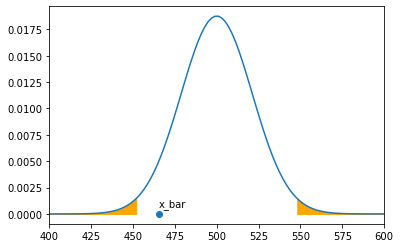

In [119]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = est_pop_std / sample_size**0.5
# Plotting the graph and setting the x limits
x=np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std) # Probability Density Function
plt.xlim(x_min, x_max)
plt.plot(x,y)

# Computing the left and right critical values(Two tailed Tests)
t_critical_left = pop_mean + (-T_critical * std) # Formula based
t_critical_right = pop_mean + (T_critical * std)

# Shading the left rejection region 
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between (x1, y1, color='orange')

# Shading the right rejection region 
x2 = np.linspace(t_critical_right, x_max,  100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between (x2, y2, color='orange')

# Plotting the sample mean 
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.0007))
print('Sample mean is ', sample_mean)
print('The acceptance region is between ', t_critical_left,'and', t_critical_right)

In [ ]:
# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

# Question 2

Q-2: You have developed a new Natural Language Processing Algorithms and done a
user study. You claim that the average rating given by the users is greater than 4 on a
scale of 1 to 5. How do you prove this to your client?

In [48]:
# Let the sample of ratings be the below list of values.
sample1 =  [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sample1

[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]

In [49]:
# Defining the sample and population paramaeters

sample_mean = np.mean(sample1)
sample_size = len (sample1)
pop_mean = 4
pop_std = 0.5

In [19]:
sample_mean

4.25

In [20]:
sample_size

20

In [50]:
est_pop_std(sample1)

0.8885233166386384

In [51]:
std_error = est_pop_std(sample1)/np.sqrt(sample_size)
std_error

0.19867985355975654

In [52]:
T_stat = ((sample_mean - pop_mean)/std_error)
T_stat

1.2583057392117918

In [53]:
# Right tail T critical value calculation
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
T_critical = scipy.stats.t.ppf(q=1-0.05,df=sample_size-1)
T_critical

1.729132811521367

Sample mean is  4.25
The rejection region is the region after  4.343543853778435


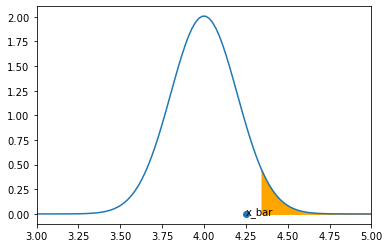

In [54]:
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 3
x_max = 5

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
#std = pop_std / sample_size**0.5
std = est_pop_std(sample1) / sample_size**0.5
# Plotting the graph and setting the x limits
x=np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std) # Probability Density Function
plt.xlim(x_min, x_max)
plt.plot(x,y)

# Computing the right critical value:
t_critical_right = pop_mean + (np.abs(T_critical) * std) # Formula based

# Shading the right rejection region 
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between (x1, y1, color='orange')


# Plotting the sample mean 
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.0007))
print('Sample mean is ', sample_mean)
print('The rejection region is the region after ', t_critical_right)

In [ ]:
# In this case sample mean falls in the Acceptance region
# i.e. So we fail to reject the Null Hypothesis

Thus, if the test statistic is less than T_critical value, the results of the test are statistically significant.

If abs(t-statistic) >= critical value: Reject null hypothesis, i.e sample mean is less than the population mean. 
If abs(t-statistic) > critical value: Fail to reject the null hypothesis.

If p > alpha: Accept null hypothesis that the means are equal. 
If p <= alpha: Reject null hypothesis that the means are equal.

In [55]:
df = sample_size - 1

In [56]:
# Conclusion using T test

if(np.abs(T_stat) > T_critical): 
    # For right tail T critical value, if T_statistic is lesser than the critical T score we can reject the Ho, and vice-versa
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')
# Conclusion using P test
p_value = (1 - t.cdf(abs(T_stat), df)) 
print('p_value =', p_value)
if(p_value < alpha):
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis
p_value = 0.11176244560925686
Fail to reject Null Hypothesis


So we can say with 95% confidence that Ha(Average Rating given by the user is GREATER THAN 4) is true

# Question 3

Q-3: TATA has developed a better fuel management system for the SUV segment. They
claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Ho = Average SUV mileage is >= 15 km/l
Ha = Average SUV mileage is < 15km/l

In [57]:
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sum(l) / len(l)

15.098999999999998

In [58]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
est_pop_std1=est_pop_std(l)

In [59]:
est_pop_std1

1.0303857223594013

In [60]:
std_error = est_pop_std1/sample_size**0.5
T_stat = (sample_mean - pop_mean) / std_error
print('Tstat:',T_stat,'Std_Error:',std_error)

Tstat: 0.4340254196029777 Std_Error: 0.2304012518240846


In [61]:
# Right tail T critical value calculation
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
T_critical = scipy.stats.t.ppf(q=1-0.05,df=sample_size-1)
T_critical

1.729132811521367

Sample mean is  15.1
The rejection region is the region after  19.27708648704764


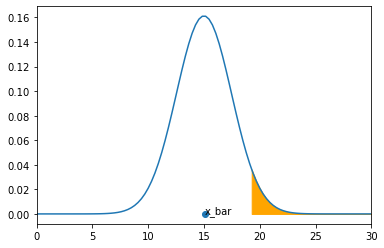

In [62]:
x_min = 0
x_max = 30

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
#std = pop_std / sample_size**0.5
std = est_pop_std(sample1) / sample_size**0.5
# Plotting the graph and setting the x limits
x=np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std) # Probability Density Function
plt.xlim(x_min, x_max)
plt.plot(x,y)

# Computing the right critical value
t_critical_right = pop_mean + (np.abs(T_critical) * std) # Formula based

# Shading the right rejection region 
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between (x1, y1, color='orange')


# Plotting the sample mean 
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.0007))
print('Sample mean is ', sample_mean)
print('The rejection region is the region after ', t_critical_right)

In this case sample mean falls in the acceptance region i.e. Fail to Reject the Null Hypothesis

Thus, if the test statistic is less than T_critical value, the results of the test are statistically significant.

If abs(t-statistic) >= critical value: Reject null hypothesis, i.e sample mean is less than the population mean. 
If abs(t-statistic) > critical value: Fail to reject the null hypothesis.

If p > alpha: Accept null hypothesis that the means are equal. 
If p <= alpha: Reject null hypothesis that the means are equal.

In [63]:
df = sample_size - 1
df

19

In [65]:
# Conclusion using T test

if(np.abs(T_stat) >= T_critical): 
    # For left tail T critical value, if T_statistic is lesser than the critical T score we can reject the Ho, and vice-versa
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')
# Conclusion using P test
p_value = (1 - t.cdf(abs(T_stat), df))
print('p_value =', p_value)
if(p_value < alpha):
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis
p_value = 0.33457924445188914
Fail to reject Null Hypothesis


Hence we can say with 95% confidence that we accept the Ha(Average SUV mileage is MORE THAN 15 km/l)

# Question 4

Q-4: You have developed a new Machine Learning Application and claim that on average
it takes less than 100 ms to predict for any future datapoint. How do you convince your
client about this claim?

Ho = Average Time taken is < 100ms
Ha = Average Time taken is > 100ms

In [66]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
est_pop_std2=est_pop_std(l)

In [67]:
std_error = est_pop_std2/sample_size**0.5
T_stat = (sample_mean - pop_mean) / std_error
print('Tstat:',T_stat,'Std_Error:',std_error)

Tstat: -0.6550881076627955 Std_Error: 3.8162805441842442


In [76]:
# Left tail T critical value calculation
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
T_critical = scipy.stats.t.ppf(q=1 - 0.05,df=sample_size-1)
T_critical

1.6603911559963895

Sample mean is  97.5
The rejection region is the region before 92.85400220944923


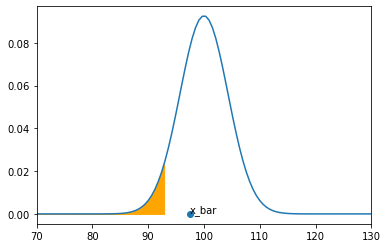

In [77]:
x_min = 70
x_max = 130

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
#std = pop_std / sample_size**0.5
std = est_pop_std(sample1) / sample_size**0.5
# Plotting the graph and setting the x limits
x=np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std) # Probability Density Function
plt.xlim(x_min, x_max)
plt.plot(x,y)

# Computing the left critical values
t_critical_left = pop_mean + (-(np.abs(T_critical)) * std) # Formula based

# Shading the left rejection region 
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between (x1, y1, color='orange')


# Plotting the sample mean
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.0007))
print('Sample mean is ', sample_mean)
print('The rejection region is the region before', t_critical_left)

In this case sample mean falls in the acceptance region i.e. we fail to reject Null Hypothesis

In [93]:
df = sample_size - 1

In [78]:
# Conclusion using T test

if(np.abs(T_stat) < -(T_critical)): 
    # For left tail T critical value, if T_statistic is lesser than the critical T score we can reject the Ho, and vice-versa
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')
# Conclusion using P test
p_value = (1 - t.cdf(abs(T_stat), df)) 
print('p_value =', p_value)
if(p_value < alpha):
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis
p_value = 0.2601320485753633
Fail to reject Null Hypothesis


Hence, we can say with 95% confidence that Alternate Hypothesis(Ha = Average Time taken is LESS THAN 100ms) is true.